In [1]:
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [6]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
resnet.trainable = False

In [7]:
model = Sequential()

# Add the ResNet base model
model.add(resnet)

# Add GlobalAveragePooling layer to flatten the feature maps
model.add(GlobalAveragePooling2D())

# Add Batch Normalization for stability
model.add(BatchNormalization())

# Add a fully connected (Dense) layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer with softmax for classification into 10 categories
model.add(Dense(10, activation='softmax'))

# Set the optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks: Reduce learning rate on plateau and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)

In [8]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=20, batch_size=64,
                    callbacks=[reduce_lr, early_stopping],
                    verbose=2)


Epoch 1/20
704/704 - 99s - 141ms/step - accuracy: 0.3545 - loss: 1.8076 - val_accuracy: 0.4284 - val_loss: 1.6086 - learning_rate: 5.0000e-04
Epoch 2/20
704/704 - 92s - 130ms/step - accuracy: 0.4201 - loss: 1.6368 - val_accuracy: 0.4412 - val_loss: 1.5409 - learning_rate: 5.0000e-04
Epoch 3/20
704/704 - 92s - 131ms/step - accuracy: 0.4388 - loss: 1.5896 - val_accuracy: 0.4642 - val_loss: 1.4992 - learning_rate: 5.0000e-04
Epoch 4/20
704/704 - 81s - 115ms/step - accuracy: 0.4552 - loss: 1.5519 - val_accuracy: 0.4784 - val_loss: 1.4736 - learning_rate: 5.0000e-04
Epoch 5/20
704/704 - 82s - 116ms/step - accuracy: 0.4594 - loss: 1.5285 - val_accuracy: 0.4868 - val_loss: 1.4494 - learning_rate: 5.0000e-04
Epoch 6/20
704/704 - 81s - 116ms/step - accuracy: 0.4667 - loss: 1.5085 - val_accuracy: 0.4744 - val_loss: 1.4499 - learning_rate: 5.0000e-04
Epoch 7/20
704/704 - 87s - 124ms/step - accuracy: 0.4734 - loss: 1.4972 - val_accuracy: 0.4932 - val_loss: 1.4189 - learning_rate: 5.0000e-04
Epoch 

In [14]:
plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

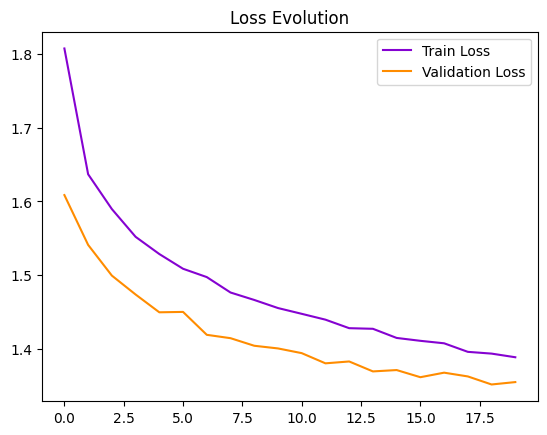

In [16]:
# Plot loss
# plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

plt.show()

Text(0.5, 1.0, 'Accuracy Evolution')

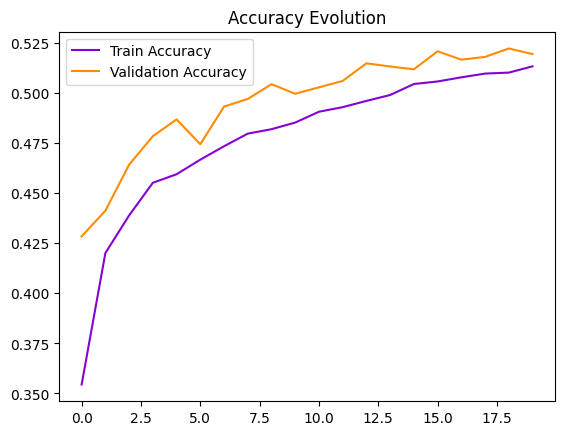

In [17]:
# Plot accuracy
# plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

In [19]:
model.save('trained_model(resnet).h5')

In [21]:
import pandas as pd

# Convert training history to a pandas DataFrame
history_df = pd.DataFrame(history.history)

# Save the history to a CSV file
history_df.to_csv('training_log(resnet).csv', index=False)